In [96]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# read the dataset
data = pd.read_csv('Data/cancer_reg.csv')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [99]:
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [100]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [101]:
household = pd.read_csv('Data/avg-household-size.csv')

In [102]:
data = data.merge(household, left_on='geography', right_on='geography', how='left', suffixes=('', '_household'))
print(data.columns)
data.head(10)

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'statefips',
       'countyfips', 'avghouseholdsize'],
      dtype='object')


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,...,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476,53,45,2.58
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,...,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317,53,47,2.42
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179,53,49,2.24
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,...,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583,53,51,2.38
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,...,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430,53,53,2.65


In [103]:
data.drop(columns = ['pctprivatecoveragealone', 'pctemployed16_over', 'statefips', 'countyfips', 'binnedinc', 'geography', 'pctsomecol18_24'], inplace=True)

In [104]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,avghouseholdsize
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,2.529682
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.248449
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.860000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,2.380000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,2.500000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.640000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,3.970000


In [105]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate',
       'avghouseholdsize'],
      dtype='object')

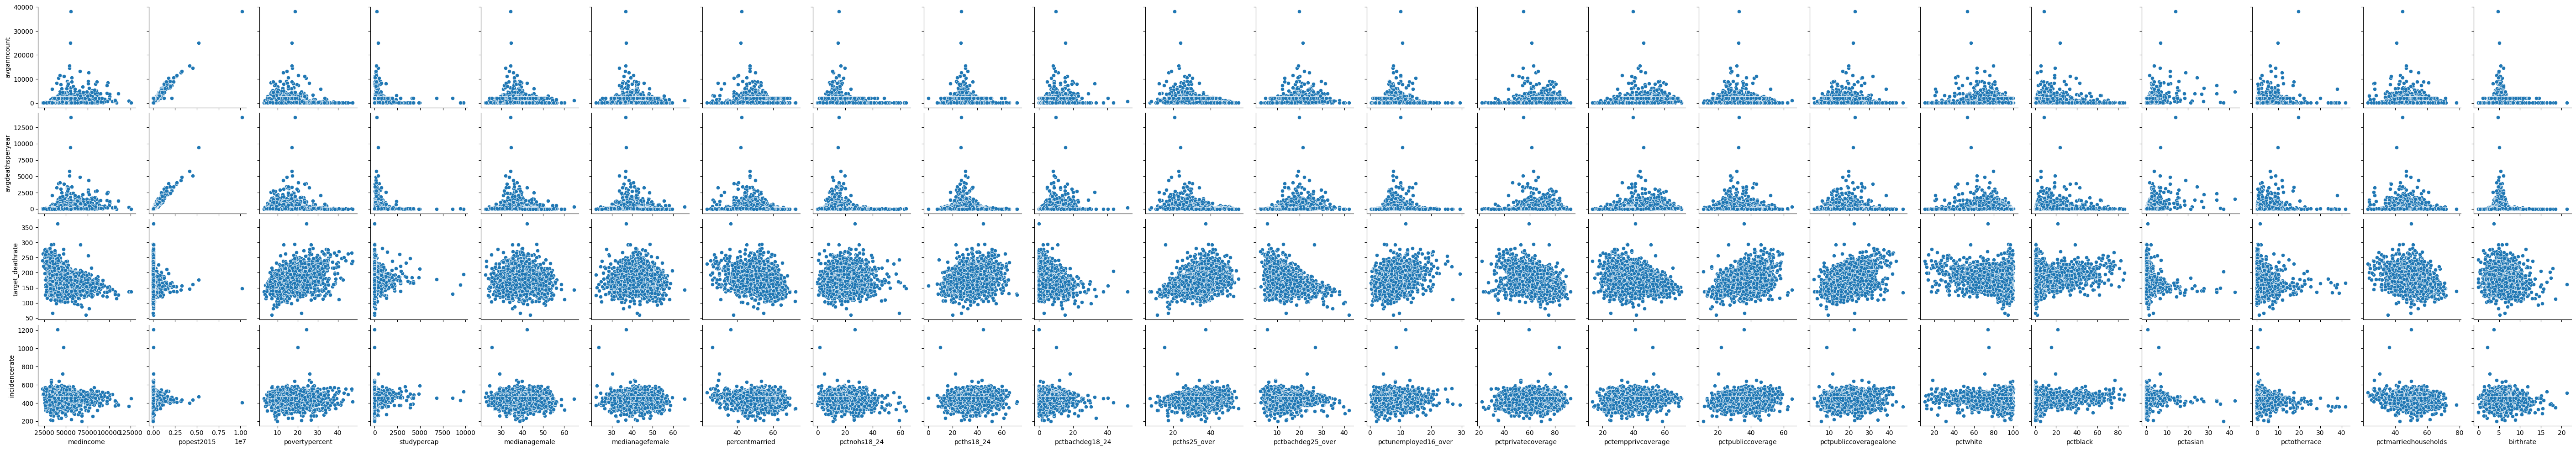

In [107]:
sns.pairplot(data, x_vars=['medincome', 'popest2015', 'povertypercent', 'studypercap',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctunemployed16_over', 'pctprivatecoverage',
       'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone',
       'pctwhite', 'pctblack', 'pctasian', 'pctotherrace',
       'pctmarriedhouseholds', 'birthrate'],
       y_vars=['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate'])

In [108]:
# ML MODEL
# import the libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [119]:
X = data.drop(axis=1, columns=['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate'] )
y = data ['incidencerate'] # predicting number of annual cancer cases
print(X.shape, y.shape)


(3047, 25) (3047,)


In [120]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape


(3047, 25)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2437, 25) (610, 25) (2437,) (610,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cross_val_scores.mean()

-1 * cross_val_scores.mean()  # to get the positive RMSE value


np.float64(-515.5689330835697)

In [121]:
lin_Reg = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
lin_Reg.fit(X_train, y_train)
cross_val_scores = cross_val_score(lin_Reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

-1 * cross_val_scores.mean()



np.float64(515.5689330835696)

In [122]:
elastic_reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 10000))
elastic_reg.fit(X_train, y_train)
cross_val_scores = cross_val_score(elastic_reg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

-1 * cross_val_scores.mean()



np.float64(520.7715578030337)

In [ ]:
y_test [y_test > 15000]

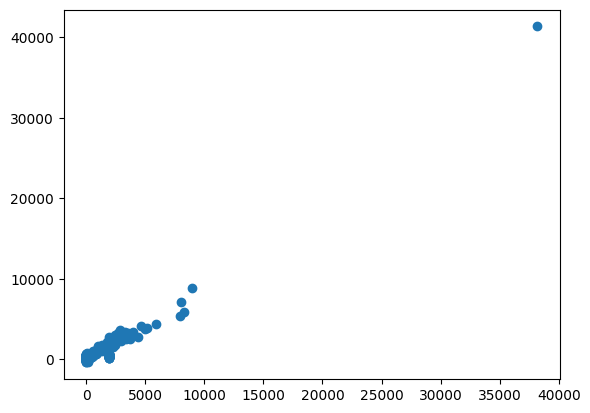

In [116]:
y_pred = model.predict(X_test)
error = y_pred - y_test
plt.scatter(y_test, y_pred)

In [117]:
model1 = ElasticNet(alpha=0.1, l1_ratio=0.5)
model1.fit(X_train, y_train)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
-1 * cross_val_scores.mean()

np.float64(515.5689330835697)

In [ ]:
y_pred_1 = lin_reg.predict(X_test)
error_1 = y_pred_1 - y_test

y_pred_2 = model1.predict(X_test)
error_2 = y_pred_2 - y_test

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(y_test, error_1)
plt.title('Linear Regression Error')
plt.xlabel('y_test')
plt.ylabel('Errors')

plt.subplot(1,2,1)
plt.scatter(y_test, error_2)
plt.title('Elastic Regression Error')
plt.xlabel('y_test')
plt.ylabel('Errors')